In [24]:
import sys

import numpy as np

from matplotlib import pyplot as plt
from skimage.transform import rotate, resize
from skimage.util import crop
from skimage.filters import gaussian

In [25]:
from rg_dataset import LRG

In [41]:
lrg_data_set = LRG(use_kittler=True, catalog_dir='catalog/mrt-table3.txt', file_dir='lrg')
# lrg_data_set = LRG(use_kittler=True, catalog_dir='catalog/mrt-table4.txt', file_dir='unlrg')

LRG:	1442/1442


In [42]:
data = lrg_data_set.data
c_data = np.zeros((len(data), 128, 128))
for i in range(len(data)):
    #resize( crop(data[i], ((24, 24), (24, 24)), copy=False), (64, 64))
    c_data[i] = gaussian(data[i], 2)

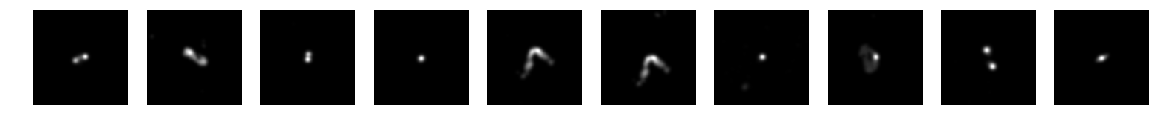

In [43]:
n = 10
f, ax = plt.subplots(1, n, figsize=(20, 5))
for i in range(n):
    ax[i].imshow(c_data[900+i], cmap='gray')
    ax[i].axis('off')

In [44]:
def find_rot_flip(avg, img, skip=1):
    min_mse = -1
    a = 0
    fl= 0
    for i in range(0, 360, skip):
        im = rotate(img, i)
        mse = np.sum((avg - im) ** 2) #mse
        if min_mse == -1 or min_mse > mse:
            min_mse = mse
            a = i
        im = im[::-1]
        mse = np.sum((avg - im) ** 2) #mse
        if min_mse == -1 or min_mse > mse:
            min_mse = mse
            a = i
            fl= 1
    return min_mse, a, fl

In [32]:
# np.sum(np.array(lrg_data_set.labels) > 1)
len(lrg_data_set.data)

14130

In [33]:
avg = c_data[0]
n_avg = np.zeros_like(avg)

1442/1442
 14.886654101527105
1442/1442
 14.275403026904248
1442/1442
 14.028573378697647
1442/1442
 13.912142672936511
1442/1442
 13.821949951087065
CPU times: user 2min 3s, sys: 1.97 s, total: 2min 5s
Wall time: 2min 2s


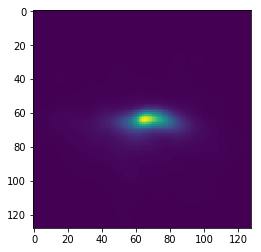

In [45]:
%%time
for j in range(5):
    err = 0
    n_avg = np.zeros_like(avg)
    for i in range(len(c_data)):
        img = c_data[i]
        min_mse, a, fl = find_rot_flip(avg, img, 10)
        err += min_mse/len(c_data)
        r_img = rotate(img, a)
        if fl : r_img = r_img[::-1]
        c_data[i] = r_img
        if(lrg_data_set.labels[i] != 1): n_avg += r_img
        sys.stdout.write('{}/{}\r'.format(i+1, len(c_data)))
        sys.stdout.flush()
    avg = n_avg / np.sum(np.array(lrg_data_set.labels) != 1)
    print('\n', err)
plt.imshow(avg)

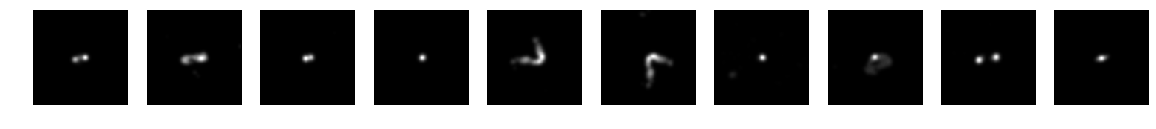

In [46]:
n = 10
f, ax = plt.subplots(1, n, figsize=(20, 5))
for i in range(n):
    ax[i].imshow(c_data[900+i], cmap='gray')
    ax[i].axis('off')

In [47]:
d_data = np.zeros((len(data), 64, 64))
for i in range(len(data)):
    d_data[i] = resize( crop(c_data[i], ((24, 24), (24, 24)), copy=False), (64, 64))

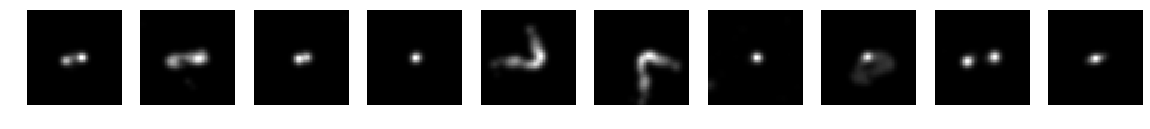

In [48]:
n = 10
f, ax = plt.subplots(1, n, figsize=(20, 5))
for i in range(n):
    ax[i].imshow(d_data[900+i], cmap='gray')
    ax[i].axis('off')

In [50]:
np.save('lrg_norm_proc', d_data)
# np.save('unlrg_norm_proc', d_data)